In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from f1_calc import get_f1_scores
from weight_calc import get_weights

In [2]:
methods = ["Mesmer", "Stardist", "Cellpose", "UnMicst"]
datapath = "/home/groups/ChangLab/dataset/HMS-TMA-TNP/OHSU-TMA/Segmentations/"
sample_ids = ['Scene 002','Scene 003', 'Scene 017', 'Scene 049', 'Scene 059']
agree_ratio = 3/4 
radius = 12

In [3]:
equal_weights = np.ones((len(sample_ids),len(methods))) * (1 / len(methods))
unequal_weights = get_weights(datapath, sample_ids, methods, radius, agree_ratio=2/3)

In [4]:
print(pd.DataFrame(equal_weights.round(2), index=sample_ids, columns=methods))
print(pd.DataFrame(unequal_weights.round(2), index=sample_ids, columns=methods))

           Mesmer  Stardist  Cellpose  UnMicst
Scene 002    0.25      0.25      0.25     0.25
Scene 003    0.25      0.25      0.25     0.25
Scene 017    0.25      0.25      0.25     0.25
Scene 049    0.25      0.25      0.25     0.25
Scene 059    0.25      0.25      0.25     0.25
           Mesmer  Stardist  Cellpose  UnMicst
Scene 002    0.57      0.03      0.41      0.0
Scene 003    0.04      0.13      0.83      0.0
Scene 017    0.67      0.01      0.31      0.0
Scene 049    0.45      0.05      0.50      0.0
Scene 059    0.56      0.01      0.43      0.0


In [5]:
equal_weight_f1_scores = get_f1_scores(datapath, sample_ids, methods, equal_weights, agree_ratio, radius)
unequal_weight_f1_scores = get_f1_scores(datapath, sample_ids, methods, unequal_weights, agree_ratio, radius)

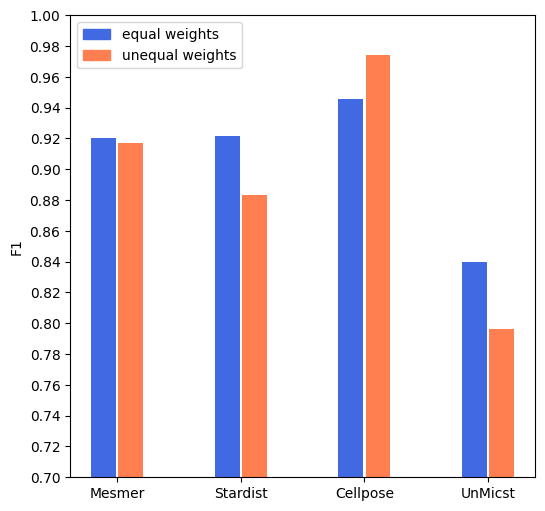

In [6]:
fig, ax = plt.subplots(1, figsize=(6,6))

ax.set(ylim=[0.90,1])

ax.bar(np.arange(4)-0.11, equal_weight_f1_scores, color='royalblue', width=0.2)
ax.bar(np.arange(4)+0.11, unequal_weight_f1_scores, color='coral', width=0.2)

plt.setp(ax, xticks=np.arange(4), xticklabels=methods)

labels = ['equal weights', 'unequal weights']
handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['royalblue','coral']]

plt.yticks(np.arange(0.7, 1, 0.02))
plt.legend(handles, labels)
plt.ylabel('F1')
plt.show()